In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy.ma as ma
import matplotlib.pyplot as plt
from pathlib import Path
import sys

def get_headers(df):
    keys = list(df.keys())[1:]
    headers = list()
    for key in keys:
        key = '_'.join(key.split('_')[:-2]).lower()
        if key not in headers:
            headers.append(key)
        else:
            break
    assert(len(set(headers)) == len(headers))
    return headers

def norm(x, L, a=[]):
    #L: L1, or L2.
    if(L not in range(1,8)):
        print("Error: L must be 1:7")
        exit()
    if(L == 1):
        return np.mean(np.abs(x))
    if(L == 2):
        return LA.norm(x,axis=1)/math.sqrt(len(x[0,:]))
    if(L == 3):
        return np.prod(np.power(x,1/len(x[0,:])),axis=1)
    if(L == 4):
        #weighted average
        return np.average(np.abs(x),weights=a)
    if(L == 5):
        #weighted product
        return np.prod(np.power(x,a/(np.sum(a))),axis=1)
    if(L == 6):
        #weighted product with linear depth weights as well
        depth = np.arange(len(x))+1
        a = a*depth
        return np.prod(np.power(x,a/(np.sum(a))))
    if(L == 7):
        depth = np.flip(np.arange(len(x))+1)
        a = a*depth
        return np.prod(np.power(x,a/(np.sum(a))))
f=Path(str(sys.path[0][0:-7])+"/outputs/results_date=2021-06-24-06-53-53_trial=0_ResNet18CIFAR_CIFAR100_Adasmomentum=0.9_weight_decay=0.0005_beta=0.9_linear=0.0_gamma=0.5_step_size=25.0_None_LR=0.03.csv")
df = pd.read_csv(f)
headers = get_headers(df)
print(headers)
df = df.T

in_KG_BE = np.asarray(df.iloc[headers.index('in_s_be') + 1::len(headers),:])
in_KG_BE = ma.masked_array(in_KG_BE, mask=in_KG_BE==0)
out_KG_BE = np.asarray(df.iloc[headers.index('out_s_be') + 1::len(headers),:])
out_KG_BE = ma.masked_array(out_KG_BE, mask=out_KG_BE==0)
KG_BE = np.ma.concatenate((in_KG_BE,out_KG_BE),axis=1)
in_MC_BE = np.asarray(df.iloc[headers.index('in_condition_be') + 1::len(headers),:])
in_MC_BE = ma.masked_array(in_MC_BE, mask=in_MC_BE==0)
out_MC_BE = np.asarray(df.iloc[headers.index('out_condition_be') + 1::len(headers),:])
out_MC_BE = ma.masked_array(out_MC_BE, mask=out_MC_BE==0)
MC_BE = np.ma.concatenate((in_MC_BE,out_MC_BE),axis=1)
in_ER_BE = np.asarray(df.iloc[headers.index('in_er_be') + 1::len(headers),:])
in_ER_BE = ma.masked_array(in_ER_BE, mask=in_ER_BE==0)
out_ER_BE = np.asarray(df.iloc[headers.index('out_er_be') + 1::len(headers),:])
out_ER_BE = ma.masked_array(out_ER_BE, mask=out_ER_BE==0)
ER_BE = np.ma.concatenate((in_ER_BE,out_ER_BE),axis=1)
in_KG_AE = np.asarray(df.iloc[headers.index('in_s') + 1::len(headers),:])
in_KG_AE = ma.masked_array(in_KG_AE, mask=in_KG_AE==0)
out_KG_AE = np.asarray(df.iloc[headers.index('out_s') + 1::len(headers),:])
out_KG_AE = ma.masked_array(out_KG_AE, mask=out_KG_AE==0)
KG_AE = np.ma.concatenate((in_KG_AE,out_KG_AE),axis=1)
in_MC_AE = np.asarray(df.iloc[headers.index('in_condition') + 1::len(headers),:])
in_MC_AE = ma.masked_array(in_MC_AE, mask=in_MC_AE==0)
out_MC_AE = np.asarray(df.iloc[headers.index('out_condition') + 1::len(headers),:])
out_MC_AE = ma.masked_array(out_MC_AE, mask=out_MC_AE==0)
MC_AE = np.ma.concatenate((in_MC_AE,out_MC_AE),axis=1)
in_ER_AE = np.asarray(df.iloc[headers.index('in_er_ae') + 1::len(headers),:])
in_ER_AE = ma.masked_array(in_ER_AE, mask=in_ER_AE==0)
out_ER_AE = np.asarray(df.iloc[headers.index('out_er_ae') + 1::len(headers),:])
out_ER_AE = ma.masked_array(out_ER_AE, mask=out_ER_AE==0)
ER_AE = np.ma.concatenate((in_ER_AE,out_ER_AE),axis=1)
in_fro_BE = np.asarray(df.iloc[headers.index('in_fro_be') + 1::len(headers),:])
in_fro_BE = ma.masked_array(in_fro_BE, mask=in_fro_BE==0)
out_fro_BE = np.asarray(df.iloc[headers.index('out_fro_be') + 1::len(headers),:])
out_fro_BE = ma.masked_array(out_fro_BE, mask=out_fro_BE==0)
fro_BE = np.ma.concatenate((in_fro_BE,out_fro_BE),axis=1)
in_spec_BE = np.asarray(df.iloc[headers.index('in_spec_be') + 1::len(headers),:])
in_spec_BE = ma.masked_array(in_spec_BE, mask=in_spec_BE==0)
out_spec_BE = np.asarray(df.iloc[headers.index('out_spec_be') + 1::len(headers),:])
out_spec_BE = ma.masked_array(out_spec_BE, mask=out_spec_BE==0)
spec_BE = np.ma.concatenate((in_spec_BE,out_spec_BE),axis=1)
in_fro_AE = np.asarray(df.iloc[headers.index('in_fro_ae') + 1::len(headers),:])
in_fro_AE = ma.masked_array(in_fro_AE, mask=in_fro_AE==0)
out_fro_AE = np.asarray(df.iloc[headers.index('out_fro_ae') + 1::len(headers),:])
out_fro_AE = ma.masked_array(out_fro_AE, mask=out_fro_AE==0)
fro_AE = np.ma.concatenate((in_fro_AE,out_fro_AE),axis=1)
in_spec_AE = np.asarray(df.iloc[headers.index('in_spec_ae') + 1::len(headers),:])
in_spec_AE = ma.masked_array(in_spec_AE, mask=in_spec_AE==0)
out_spec_AE = np.asarray(df.iloc[headers.index('out_spec_ae') + 1::len(headers),:])
out_spec_AE = ma.masked_array(out_spec_AE, mask=out_spec_AE==0)
spec_AE = np.ma.concatenate((in_spec_AE,out_spec_AE),axis=1)
in_noise = np.asarray(df.iloc[headers.index('in_noise') + 1::len(headers),:])
in_noise = ma.masked_array(in_noise, mask=in_noise==0)
out_noise = np.asarray(df.iloc[headers.index('out_noise') + 1::len(headers),:])
out_noise = ma.masked_array(out_noise, mask=out_noise==0)
noise = np.ma.concatenate((in_noise,out_noise),axis=1)

tag = 'test_acc1'
if 'test_acc1' not in headers:
    tag = 'test_acc'
    if 'test_acc' not in headers:
        tag = 'acc'
test_acc = np.asarray(
    df.iloc[headers.index(tag) + 1::len(headers), :])
tag = 'train_acc1'
if 'train_acc1' not in headers:
    tag = 'train_acc'
try:
    train_acc = np.asarray(
        df.iloc[headers.index(tag) + 1::len(headers), :])
except:
    print(1)
train_loss = np.asarray(
            df.iloc[headers.index('train_loss') + 1::len(headers), :])
try:
    test_loss = np.asarray(
                df.iloc[headers.index('test_loss') + 1::len(headers), :])
except:
    print(2)


gap = train_acc - test_acc

QG_BE = np.arctan2(KG_BE,(1-1/MC_BE))
QG_AE = np.arctan2(KG_AE,(1-1/MC_AE))

QG_BE = np.asarray([norm(QG_BE,2),norm(QG_BE,3)])
QG_AE = np.asarray([norm(QG_AE,2),norm(QG_AE,3)])
ER_BE = np.asarray([norm(ER_BE,2),norm(ER_BE,3)])
ER_AE = np.asarray([norm(ER_AE,2),norm(ER_AE,3)])
noise = np.asarray([norm(noise,2),norm(noise,3)])
F_BE = np.asarray([norm(fro_BE,2),norm(fro_BE,3)])
F_AE = np.asarray([norm(fro_AE,2),norm(fro_AE,3)])
S_BE = np.asarray([norm(spec_BE,2),norm(spec_BE,3)])
S_AE = np.asarray([norm(spec_AE,2),norm(spec_AE,3)])
x=np.arange(0,250,1)

['train_acc1', 'train_acc5', 'train_loss', 'in_s', 'out_s', 'in_s_be', 'out_s_be', 'fc_s', 'in_rank', 'out_rank', 'fc_rank', 'in_condition', 'out_condition', 'in_condition_be', 'out_condition_be', 'in_er_ae', 'out_er_ae', 'in_er_be', 'out_er_be', 'in_fro_be', 'out_fro_be', 'in_spec_be', 'out_spec_be', 'in_fro_ae', 'out_fro_ae', 'in_spec_ae', 'out_spec_ae', 'in_noise', 'out_noise', 'rank_velocity', 'learning_rate', 'test_acc1', 'test_acc5', 'test_loss']


In [18]:
COLORS = {'SGD':     np.array((127, 230, 127)) / 255,
         'RAdam':      np.array((0, 212, 255))/255,
         'SAM':     np.array((229, 127, 255))/255,
         'Adam':     np.array((120, 70, 255))/255,
         'AdaGrad':      np.array((230, 240, 50))/255,
         'AdaBound': np.array((255, 178, 50))/255,
         'Adas':  np.array((130, 0, 0))/255,
         'SGDP':    np.array((62, 178, 134))/255,
         'AdamW':      np.array((174, 127, 255))/255,
         'SLS':    np.array((165, 102, 8))/255,
         'AdamP':    np.array((255, 127, 148))/255,
         'AdaBelief': np.array((251, 124, 12))/255}

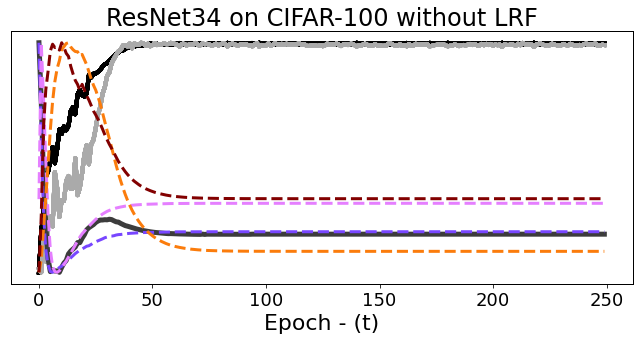

In [19]:
fig, ax1 = plt.subplots()

ln1 = ax1.plot(x, test_acc,color=np.array((0,0,0))/255,lw=4)

ax1.set_xlabel('Epoch - (t)',fontsize=22)
ax1.set_yticks([])
ax1.tick_params(axis='x',labelsize=18)

ax11 = ax1.twinx()
ln11 = ax11.plot(x, gap, color=np.array((170,170,170))/255,lw=4)
ax11.set_yticks([])
#ax11.set_xticks([])

ax10 = ax1.twinx()
ln10 = ax10.plot(x, noise[0,:], color=np.array((60,60,60))/255, lw=5)
ax10.set_yticks([])
#ax10.set_xticks([])

ax2 = ax1.twinx()
ln2 = ax2.plot(x, QG_BE[1,:],'--',color=COLORS["Adam"],lw=3)
ax2.set_yticks([])
#ax2.set_xticks([])
'''
ax3 = ax1.twinx()
ln3 = ax3.plot(x, QG_BE[1,:],color='green')
ax3.set_yticks([])
'''
ax5 = ax1.twinx()
ln5 = ax5.plot(x, ER_BE[0,:],'--',color=COLORS["SAM"],lw=3)
ax5.set_yticks([])
#ax5.set_xticks([])

'''
ax4 = ax1.twinx()
ln4 = ax4.plot(x, ER_BE[0,:],color='orange')
ax4.set_yticks([])
'''
ax7 = ax1.twinx()
ln7 = ax7.plot(x, F_BE[0,:],'--',color=COLORS["AdaBelief"],lw=3)
ax7.set_yticks([])
#ax7.set_xticks([])

'''
ax6 = ax1.twinx()
ln6 = ax6.plot(x, F_BE[0,:],color='yellow')
ax6.set_yticks([])
'''
ax9 = ax1.twinx()
ln9 = ax9.plot(x, S_BE[0,:],"--",color=COLORS["Adas"],lw=3)
ax9.set_yticks([])
#ax9.tick_params(axis='x',labelsize=20)

'''
ax8 = ax1.twinx()
ln8 = ax8.plot(x, S_BE[0,:],color='brown')
ax8.set_yticks([])
'''



plt.title("ResNet34 on CIFAR-100 without LRF", fontsize=24)
plt.xticks(fontsize=24)
fig.tight_layout()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()


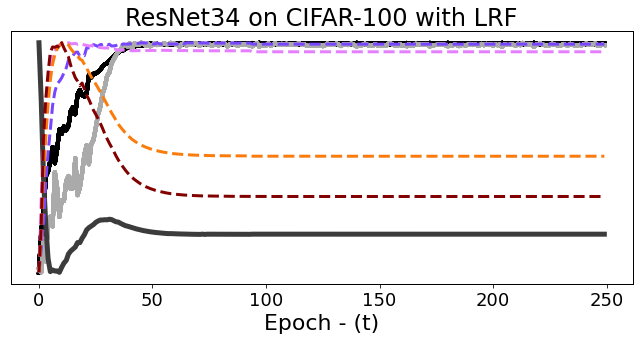

In [21]:
fig, ax1 = plt.subplots()

ln1 = ax1.plot(x, test_acc,color=np.array((0,0,0))/255,lw=4)
ax1.tick_params(axis='x',labelsize=18)
ax1.set_xlabel('Epoch - (t)',fontsize=22)
ax1.set_yticks([])

ax11 = ax1.twinx()
ln11 = ax11.plot(x, gap, color=np.array((170,170,170))/255,lw=4)
ax11.set_yticks([])

ax10 = ax1.twinx()
ln10 = ax10.plot(x, noise[0,:], color=np.array((60,60,60))/255, lw=5)
ax10.set_yticks([])

ax2 = ax1.twinx()
ln2 = ax2.plot(x, QG_AE[1,:],'--',color=COLORS["Adam"],lw=3)
ax2.set_yticks([])
'''
ax3 = ax1.twinx()
ln3 = ax3.plot(x, QG_BE[1,:],color='green')
ax3.set_yticks([])
'''
ax5 = ax1.twinx()
ln5 = ax5.plot(x, ER_AE[0,:],'--',color=COLORS["SAM"],lw=3)
ax5.set_yticks([])

'''
ax4 = ax1.twinx()
ln4 = ax4.plot(x, ER_BE[0,:],color='orange')
ax4.set_yticks([])
'''
ax7 = ax1.twinx()
ln7 = ax7.plot(x, F_AE[0,:],'--',color=COLORS["AdaBelief"],lw=3)
ax7.set_yticks([])

'''
ax6 = ax1.twinx()
ln6 = ax6.plot(x, F_BE[0,:],color='yellow')
ax6.set_yticks([])
'''
ax9 = ax1.twinx()
ln9 = ax9.plot(x, S_AE[0,:],"--",color=COLORS["Adas"],lw=3)
ax9.set_yticks([])

'''
ax8 = ax1.twinx()
ln8 = ax8.plot(x, S_BE[0,:],color='brown')
ax8.set_yticks([])
'''



plt.title("ResNet34 on CIFAR-100 with LRF", fontsize=24)
fig.tight_layout()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()


In [26]:
legend_elements = [Line2D([0], [0], color='black', lw=2, label='test accuracy'),Line2D([0], [0], color='grey', lw=2, label='generalization gap'),Line2D([0], [0], color='brown', lw=2, label='noise'),Line2D([0], [0], color='green', ls=':', lw=3, label=r'${Q}_{SQ}^{p}$'),Line2D([0], [0], color='blue', ls=':', lw=3, label=r'${Q}_{E}^{L2}$'),
Line2D([0], [0], color='yellow', lw=3, ls=":", label=r'${Q}_{F}^{L2}$'),Line2D([0], [0], color='red', lw=3, ls=":", label=r'${Q}_{S}^{L2}$')]


<ipython-input-39-c5e58cd25453>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  legendFig.show()


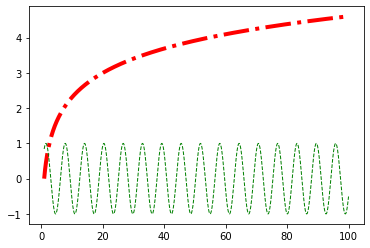

<Figure size 1440x756 with 0 Axes>

In [39]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot")

legendFig = plt.figure("Legend plot")
legendFig.set_size_inches(12, 1.3)
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
legend_elements = [Line2D([0], [0], color='black', lw=4, label='test accuracy'),Line2D([0], [0], color=COLORS["SAM"], ls='--', lw=3, label=r'${Q}_{E}^{L2}$'),Line2D([0], [0], color='brown', lw=4, label='noise'),Line2D([0], [0], color=COLORS["Adam"], ls='--', lw=3, label=r'${Q}_{SQ}^{p}$'),Line2D([0], [0], color='grey', lw=4, label='generalization gap'),
Line2D([0], [0], color=COLORS["AdaBelief"], lw=3, ls="--", label=r'${Q}_{F}^{L2}$'),Line2D([0], [0], color=COLORS["ADAS"], lw=3, ls="--", label=r'${Q}_{S}^{L2}$')]
legendFig.legend(handles=legend_elements, ncol=4, loc='center', prop={'size': 22})
legendFig.show()
legendFig.savefig('legend.png')

<ipython-input-40-e9ad1a9cec46>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  legendFig.show()


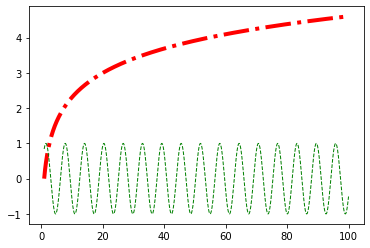

<Figure size 864x93.6 with 0 Axes>

In [40]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot")

legendFig = plt.figure("Legend plot")
legendFig.set_size_inches(12, 1.3)
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
legend_elements = [Line2D([0], [0], color='black', lw=4, label='test accuracy'),Line2D([0], [0], color=COLORS["SAM"], ls='--', lw=3, label=r'$\widehat{Q}_{E}^{L2}$'),Line2D([0], [0], color='brown', lw=4, label='noise'),Line2D([0], [0], color=COLORS["Adam"], ls='--', lw=3, label=r'$\widehat{Q}_{SQ}^{p}$'),Line2D([0], [0], color='grey', lw=4, label='generalization gap'),
Line2D([0], [0], color=COLORS["AdaBelief"], lw=3, ls="--", label=r'$\widehat{Q}_{F}^{L2}$'),Line2D([0], [0], color=COLORS["Adas"], lw=3, ls="--", label=r'$\widehat{Q}_{S}^{L2}$')]
legendFig.legend(handles=legend_elements, ncol=4, loc='center', prop={'size': 22})
legendFig.show()
legendFig.savefig('legendlrf.png')